# Web Scraping Quest 2

Continue your training by scraping Chuck Norris facts from this address: [Chuck Norris facts](https://chucknorrisfacts.net/facts.php?page=1).

* Look carefully at the URL on page 1. Try moving to page 2. In a python notebook, try to automatically generate the URLs of the first 5 pages.

In [1]:
# This will be the main site URL
site_url = "https://chucknorrisfacts.net/facts.php"

# Generating first 5 pages of the Chuck Norris facts
urls = [(site_url + "?page=" + str(i + 1)) for i in range(5)]

urls

['https://chucknorrisfacts.net/facts.php?page=1',
 'https://chucknorrisfacts.net/facts.php?page=2',
 'https://chucknorrisfacts.net/facts.php?page=3',
 'https://chucknorrisfacts.net/facts.php?page=4',
 'https://chucknorrisfacts.net/facts.php?page=5']

* Use _BeautifulSoup_ to scrape the facts and notes from the first 5 pages, thanks to the URLs you have generated (We could do the next 100 or 200 pages, but that might cause an unnecessary load for those who administer this server.) The result should be in a dictionary.

In [2]:
import requests
from bs4 import BeautifulSoup
import time

import pandas as pd


# Setting the user-agent from my browser
user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:90.0) Gecko/20100101 Firefox/90.0"

# Adding the "User-Agent" into HTTP headers (dictionary)
headers = {
    "User-Agent": user_agent
}

# Jokes dictionary
jokes = {
    "text": [],
    "note": []
}


# Repeat for every url (5 pages)
for url in urls:

    # Give the interwebs some time to recover
    time.sleep(2)

    # Perform HTTP GET request from the URL
    r = requests.get(url, headers=headers)

    # Cook some soup
    s = BeautifulSoup(r.text, "html.parser")

    # Get all joke items (whole div tag containing the joke)
    items = s.find_all("div", attrs={"style":"border-top: 1px solid #251836; padding: 0 0 5px 7px;"})

    # Extract text and note into the dictionary elements (lists)
    for item in items:
        jokes["text"].append(item.find("p").text)
        jokes["note"].append(item.find("div", class_="rated_text").text)


# Now we've got a dictionary `jokes`
print(f"jokes['text'] contains {len(jokes['text'])} jokes.")
print(f"jokes['note'] contains {len(jokes['note'])} notes.")

# A preview
print("\nPreview (5 lines):")
[print(jokes["text"][i], jokes["note"][i]) for i in range(5)]

# Just a stupid trick to prevent Jupyter notebook to print out last line variable content (empty list)
print()


jokes['text'] contains 100 jokes.
jokes['note'] contains 100 notes.

Preview (5 lines):
There is no 'ctrl' button on Chuck Norris' computer. Chuck Norris is always in control. Rated 3.74/5 (1076 Votes)
Chuck Norris doesnt sleep. He waits. Rated 3.82/5 (865 Votes)
Some kids piss their name in the snow. Chuck Norris can piss his name into concrete. Rated 4.05/5 (4940 Votes)
Chuck Norris' calendar goes straight from March 31st to April 2nd. No one fools Chuck Norris.  Rated 4.08/5 (5018 Votes)
Chuck Norris is the only person in the world that can actually email a roundhouse kick. Rated 3.58/5 (672 Votes)



* Create a DataFrame containing this data, so it must have 2 columns and 100 rows.

In [3]:
import numpy as np
import pandas as pd

# This is why I chose to have 2 lists inside a dictionary:
# (this way it's so easy to create DataFrame)
df = pd.DataFrame(jokes)

# no more orientation fixing
# no more column renaming

df

,text,note
0,There is no 'ctrl' button on Chuck Norris' com...,Rated 3.74/5 (1076 Votes)
1,Chuck Norris doesnt sleep. He waits.,Rated 3.82/5 (865 Votes)
2,Some kids piss their name in the snow. Chuck N...,Rated 4.05/5 (4940 Votes)
3,Chuck Norris' calendar goes straight from Marc...,Rated 4.08/5 (5018 Votes)
4,Chuck Norris is the only person in the world t...,Rated 3.58/5 (672 Votes)
...,...,...
95,"While urinating, Chuck Norris is easily capabl...",Rated 3.44/5 (181 Votes)
96,Chuck Norris once sued the Houghton-Mifflin te...,Rated 3.17/5 (155 Votes)
97,"When Chuck Norris talks, everybody listens. An...",Rated 2.64/5 (179 Votes)
98,"When Steven Seagal kills a ninja, he only take...",Rated 2.85/5 (147 Votes)


* Creates a visualization of the distribution of the notes.

In [5]:
# I have to admin I'm lost in translation and it's not clear what the "notes"
# really are. However, let's get some data that can be visualized for distribution.
#
# That'd be:
#   - rating
#   - count of votes

# So I used this .str.extract() function,
#   which uses regex with groupings to find
#   portions of the string and stores them
#   as new DataFrame.
#
#   There are two portions (rating, vote_count).
#
#   Then I'm converting them to np.float64


# -~=[ The Magic ]=~- #
df[["rating","vote_count"]] = (
    df["note"]
    .str.extract(r"^Rated ([1-5]\.?[0-9]{0,2})/5 \(([0-9]+) Votes\)$")
    .astype(np.float64)
)

df.sample(5)

,text,note,rating,vote_count
9,Chuck Norris doesn't read books. He stares the...,Rated 3.83/5 (779 Votes),3.83,779.0
0,There is no 'ctrl' button on Chuck Norris' com...,Rated 3.74/5 (1076 Votes),3.74,1076.0
21,Chuck Norris can sneeze with his eyes open.,Rated 3.65/5 (310 Votes),3.65,310.0
73,Superman owns a pair of Chuck Norris pajamas.,Rated 4.05/5 (2608 Votes),4.05,2608.0
50,"Contrary to popular belief, America is not a d...",Rated 3.51/5 (212 Votes),3.51,212.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8e0fa95390>,
      dtype=object)

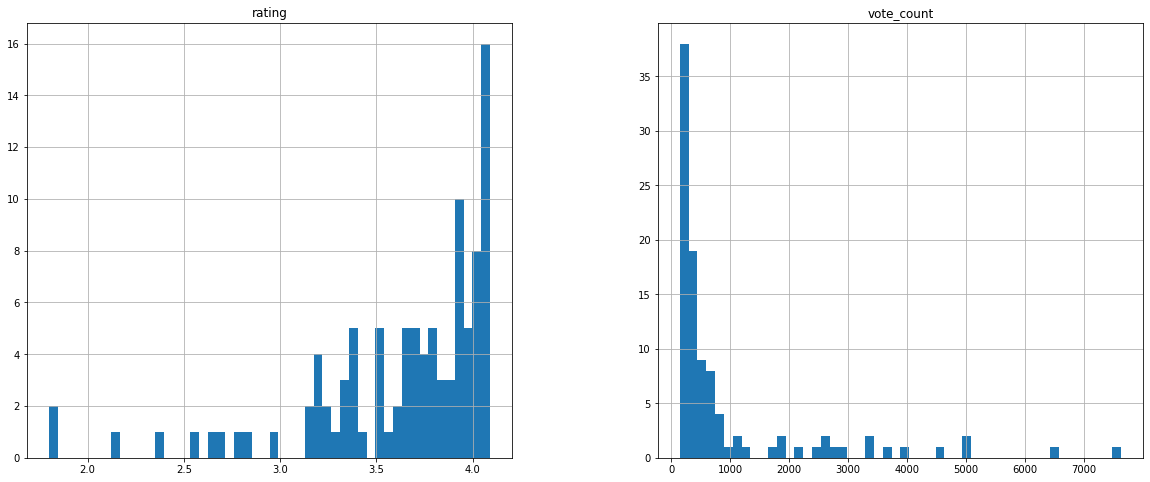

In [6]:
# Using pandas to plot histograms
df[["rating", "vote_count"]].hist(bins=50, figsize=(20,8))